***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plot style
sns.set_style('whitegrid')

**Importing Dataset**

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

**Load the Data**

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Issue Detected:** The `TotalCharges` column is expected to be numeric, but it is currently of type `object`, suggesting the presence of non-numeric entries that need to be addressed.


**Data Cleaning**

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [7]:
print(f"Shape after converting TotalCharges to numeric: {df.shape}")

Shape after converting TotalCharges to numeric: (7043, 21)


In [8]:
print(f"Number of missing TotalCharges: {df['TotalCharges'].isnull().sum()}")

Number of missing TotalCharges: 11


In [9]:

# Impute the missing values with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(f"Shape after imputing TotalCharges: {df.shape}")


Shape after imputing TotalCharges: (7043, 21)


In [10]:
# Convert target variable 'Churn' to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(f"Shape after converting Churn to binary: {df.shape}")

Shape after converting Churn to binary: (7043, 21)


In [11]:
# Drop customerID as it's not a predictive feature
df.drop('customerID', axis=1, inplace=True)



In [12]:
pd.set_option('display.max_columns', None)
display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


**Looking Into the Dataset**

In [14]:
dataset_columns = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
"DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

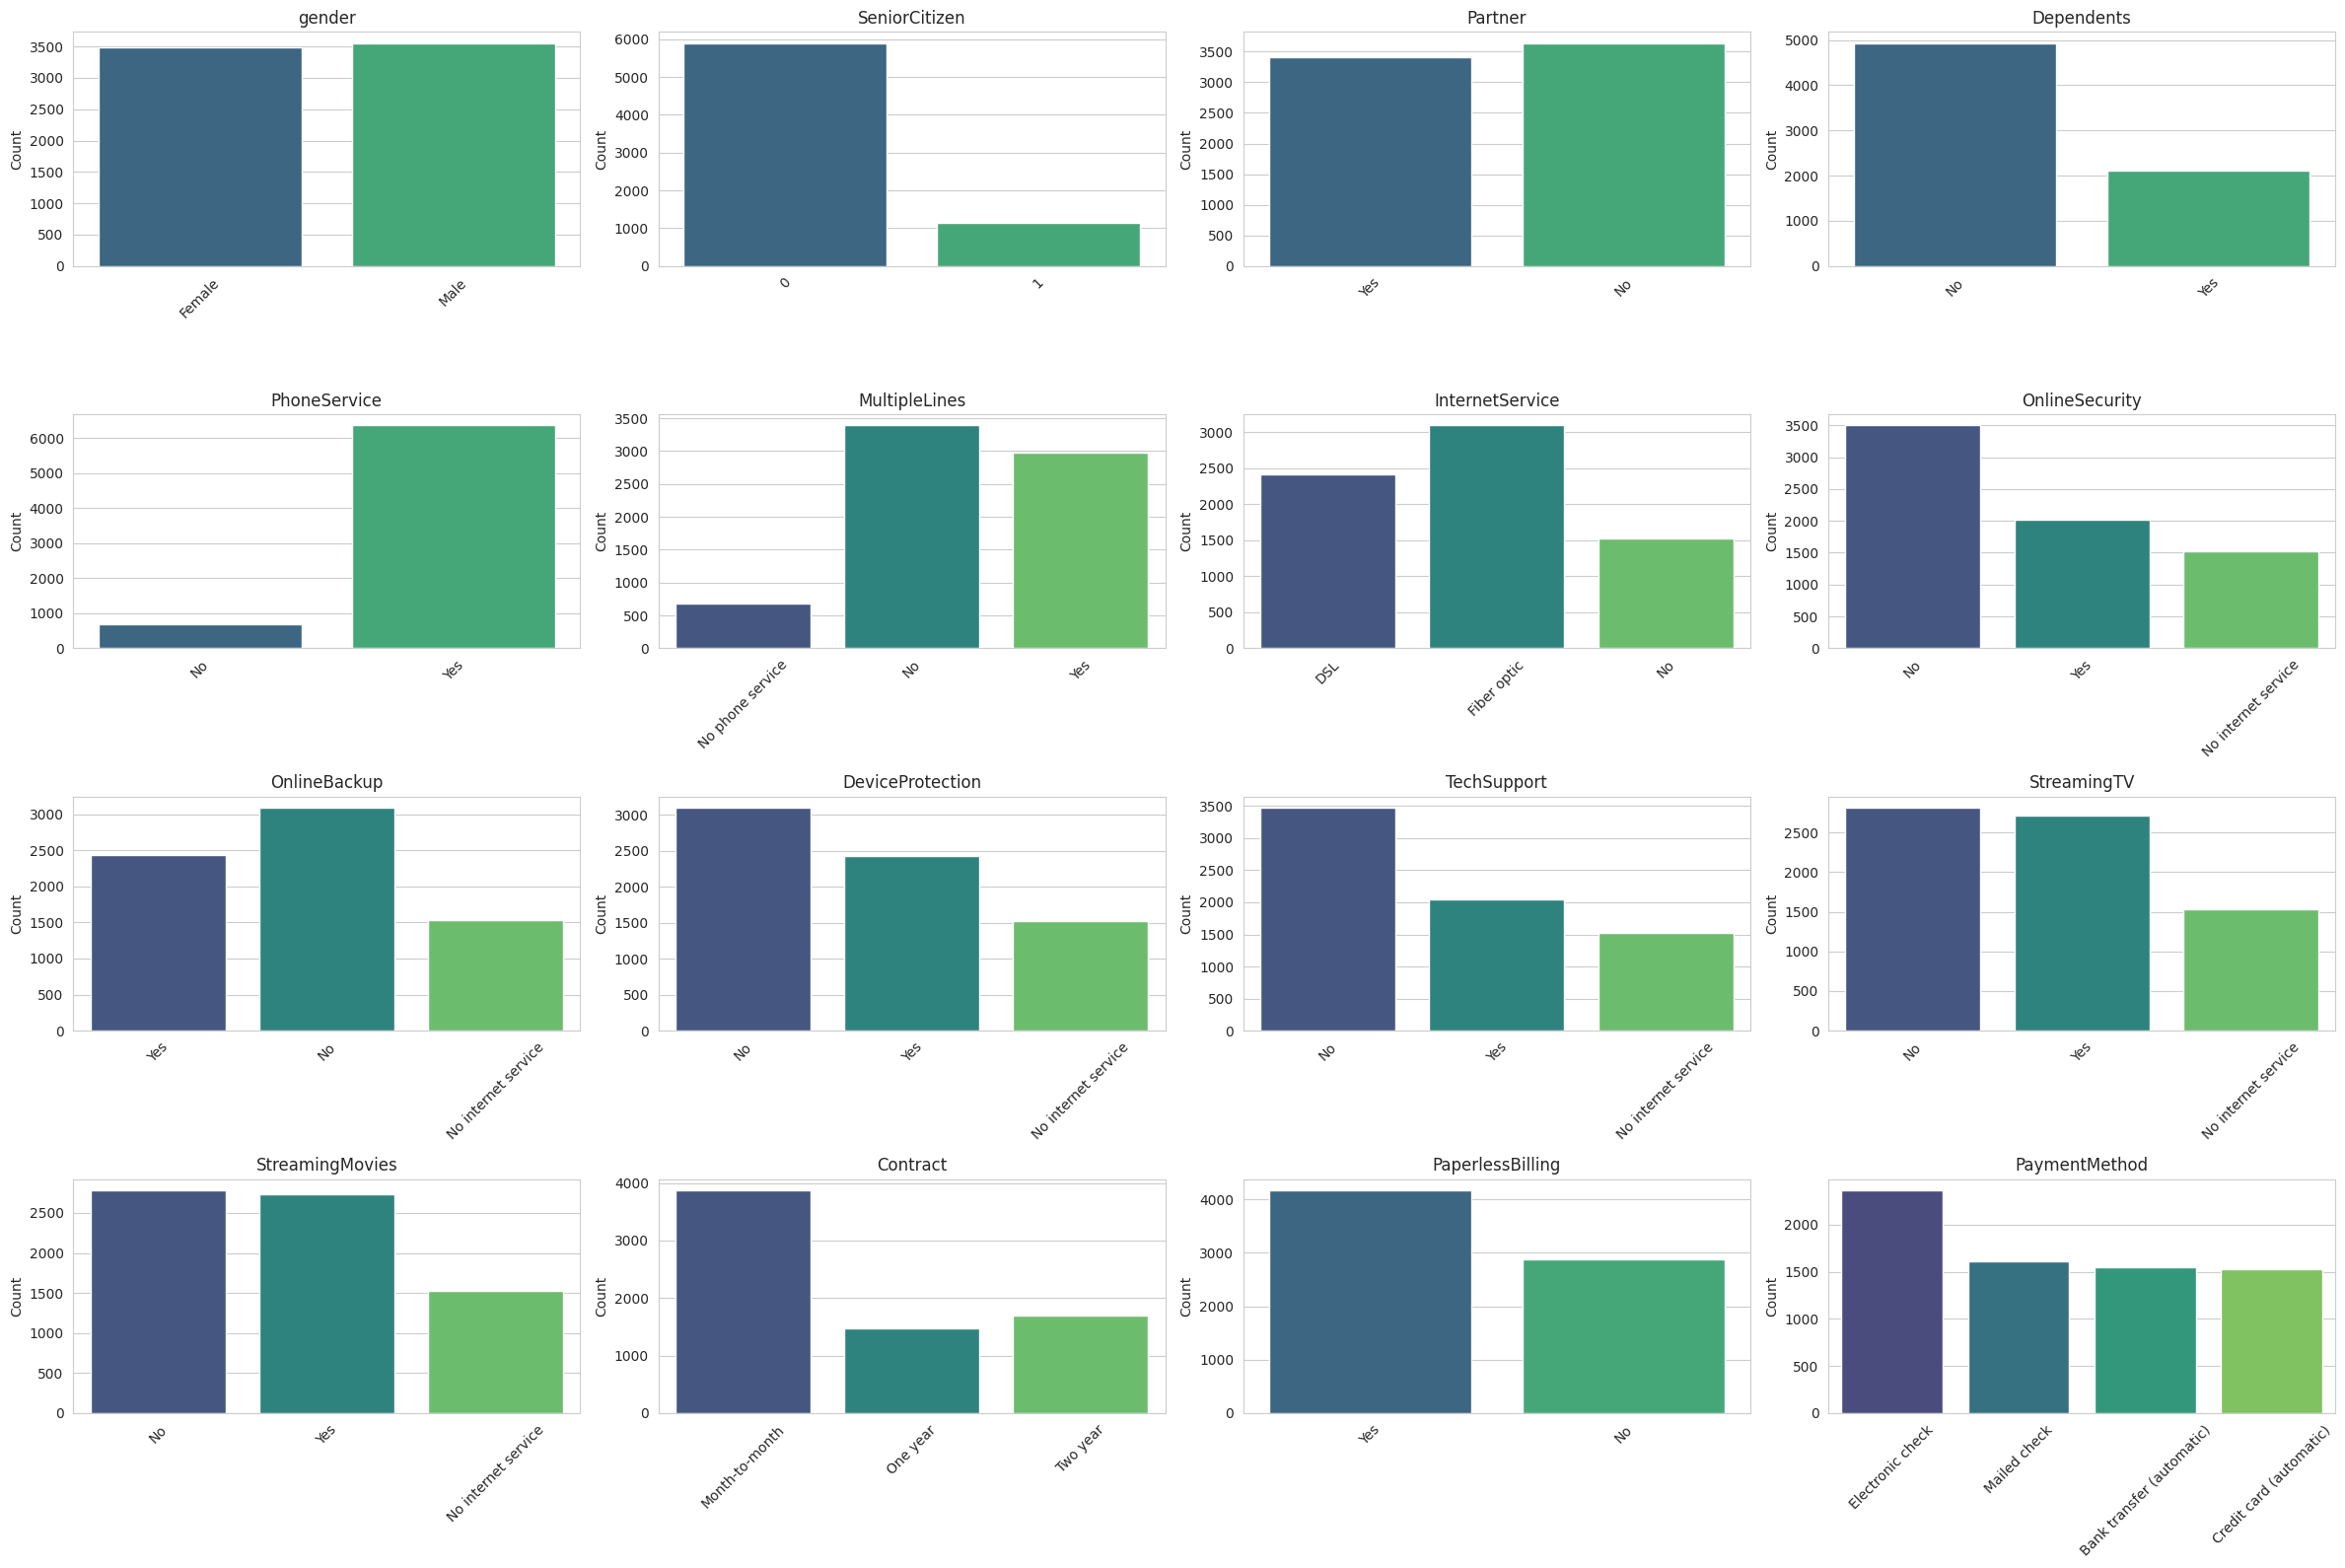

In [15]:
# define grid size
n_cols = 4  # number of columns per row
n_rows = int(np.ceil(len(dataset_columns) / n_cols))  # number of rows needed

# create figure
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

# loop through each column and plot
for i, col in enumerate(dataset_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(col, fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. gender

Roughly equal distribution between Male and Female customers.

Insight: Gender distribution is balanced, so gender is unlikely to strongly influence churn alone.

2. SeniorCitizen

Most customers are not senior citizens (value = 0).

Insight: Younger or middle-aged customers form the majority of the customer base.

3. Partner

“Yes” and “No” are almost evenly split.

Insight: The presence of a partner doesn’t heavily skew the dataset; both groups are well represented.

4. Dependents

Majority of customers don’t have dependents.

Insight: Indicates that many customers may be single or living independently.

5. PhoneService

Almost all customers have phone service.

Insight: Phone service is nearly universal among customers — not a useful variable for segmentation.

6. MultipleLines

Many customers have no multiple lines; some “No phone service”.

Insight: Only a subset of customers opt for multiple phone lines, could be linked to family or business usage.

7. InternetService

DSL and Fiber optic are common; “No” category smaller.

Insight: Internet is a core service — fiber optic users might differ in spending or churn behavior.

8. OnlineSecurity

Majority say No, followed by Yes, then “No internet service”.

Insight: Many customers skip security add-ons — possibly a factor in churn if they perceive less value.

9. OnlineBackup

Distribution: No > Yes > No internet service.

Insight: Similar trend to security — indicates optional add-ons have lower adoption.

10. DeviceProtection

No is most common, followed by Yes.

Insight: Again, relatively low adoption of extra services — may be tied to customer price sensitivity.

11. TechSupport

Most customers don’t have tech support.

Insight: Limited tech support could contribute to dissatisfaction and churn.

12. StreamingTV

No and Yes are close; some “No internet service”.

Insight: Streaming adoption is moderate — could indicate customer preferences shifting toward bundled entertainment.

13. StreamingMovies

Similar to StreamingTV — No and Yes roughly balanced.

Insight: Consistent streaming patterns; potential area for targeted promotions.

14. Contract

Most customers are on month-to-month contracts; fewer on one-year or two-year.

Insight: Month-to-month users are typically more flexible and more likely to churn — an important churn predictor.

15. PaperlessBilling

Majority use Yes (paperless billing).

Insight: Paperless billing is the norm, possibly tied to digital-savvy customers.

16. PaymentMethod

Electronic check is most popular; other methods (Mailed check, Bank transfer, Credit card) are lower.

Insight: Customers using electronic checks might differ in churn patterns; some studies show they churn more often.

**Model Training Without Feature Enineering**

In [16]:
# Defining features (X) and target (y)
X_base = df.drop('Churn', axis=1)
y_base = df['Churn']

# Identifying categorical and numerical features
numerical_features_base = X_base.select_dtypes(include=np.number).columns.tolist()
categorical_features_base = X_base.select_dtypes(include=['object']).columns.tolist()

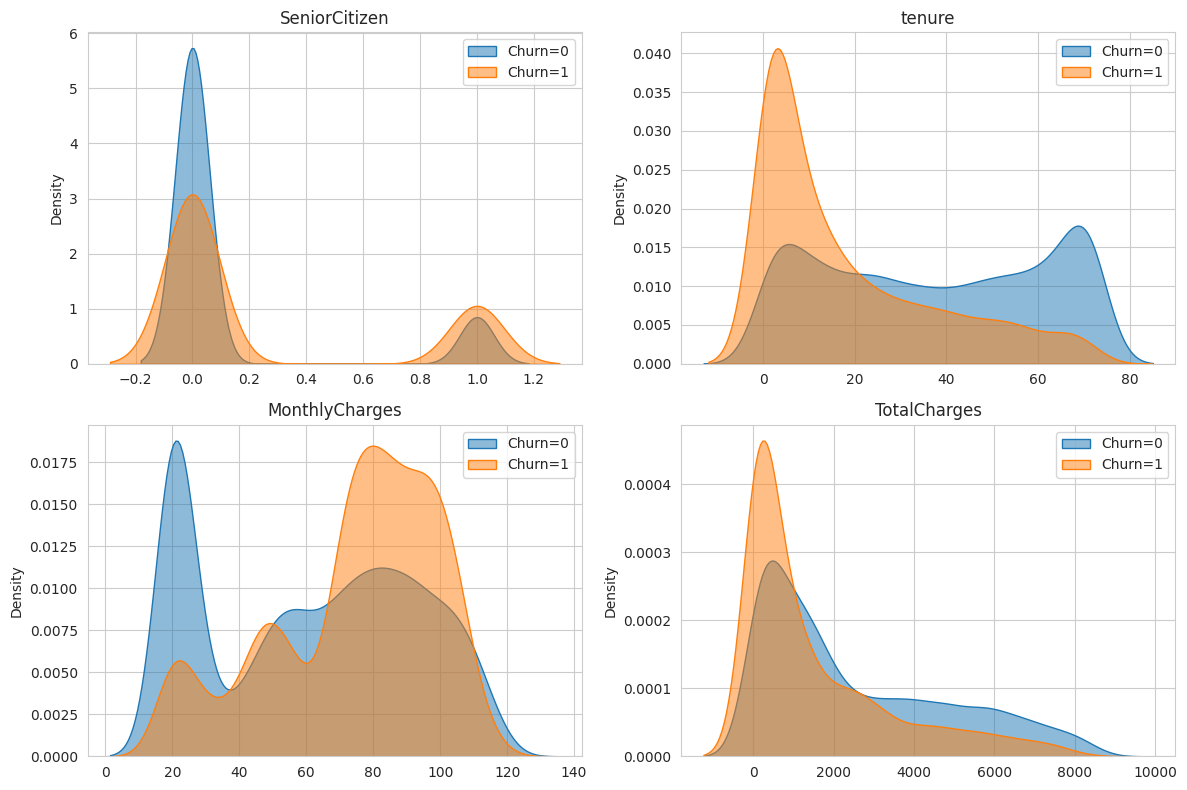

In [17]:
n_rows, n_cols = 2, 2  # fixed 2x2 grid

plt.figure(figsize=(12, 8))  # width × height in inches

for i, col in enumerate(numerical_features_base[:4], 1):  # just take first 4 numeric columns
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(df[df['Churn'] == 0][col], fill=True, label='Churn=0', alpha=0.5)
    sns.kdeplot(df[df['Churn'] == 1][col], fill=True, label='Churn=1', alpha=0.5)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.legend()

plt.tight_layout()
plt.show()


**Top-left: SeniorCitizen**

The distribution for Churn=0 is tall and narrow around 0, indicating most non-churners are not senior citizens.

The distribution for Churn=1 is slightly shifted toward 1, suggesting a higher proportion of senior citizens among churned customers.

**Top-right: tenure**

Churn=0 has a wider distribution, with peaks at higher tenure values (longer customer tenure).

Churn=1 peaks at lower tenure, showing that customers who churn tend to have shorter subscription durations.

**Bottom-left: MonthlyCharges**

Churn=1 distribution is shifted toward higher monthly charges compared to Churn=0.

Suggests that customers paying higher monthly fees are more likely to churn.

**Bottom-right: TotalCharges**

Churn=0 is more spread out toward higher total charges, while Churn=1 peaks at lower total charges.

Indicates churned customers generally have lower accumulated spending, likely because they left early.

In [18]:
numerical_features_base

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

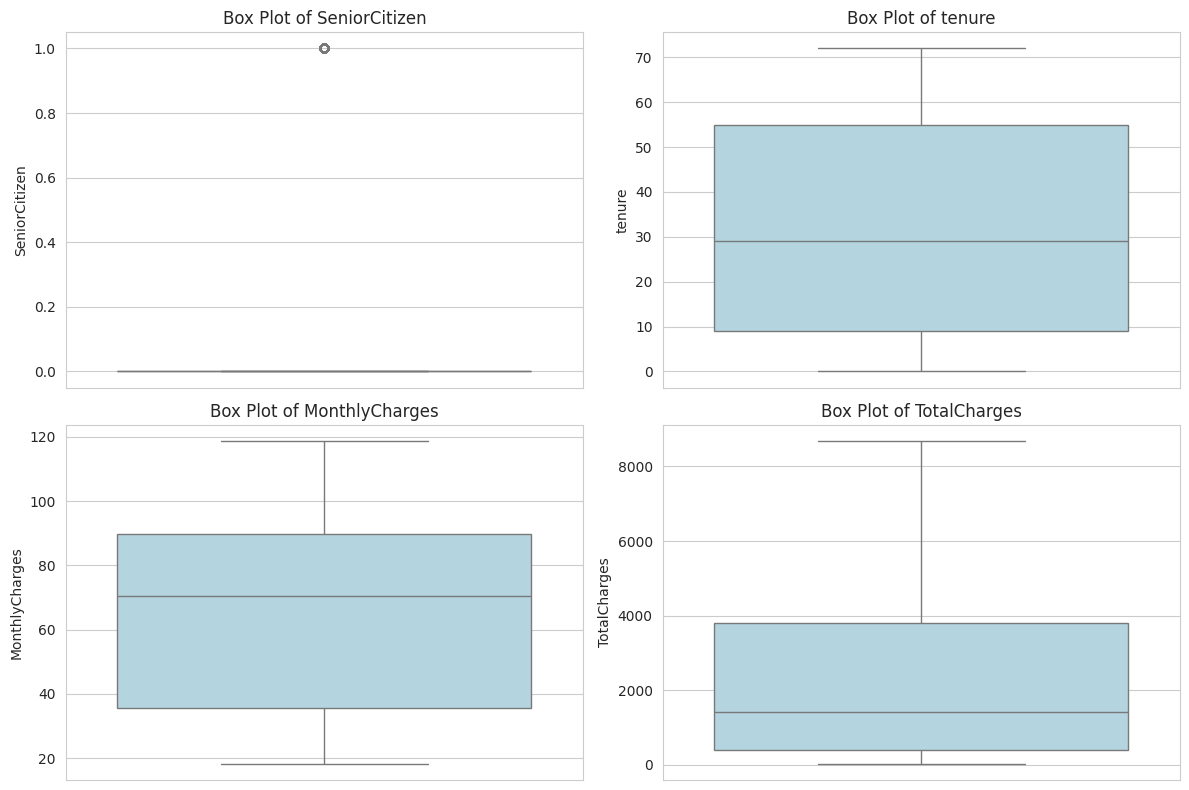

In [19]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_features_base, 1):
    plt.subplot(2, 2, i)  # 2 rows × 2 columns
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [20]:
categorical_features_base

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [21]:
# Creating the preprocessing pipeline
preprocessor_base = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_base),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_base)])

In [22]:
# Split data
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42, stratify=y_base)


In [23]:
# Creating the full pipeline with a classifier
baseline_model = Pipeline(steps=[('preprocessor', preprocessor_base),
                                 ('classifier', LogisticRegression(random_state=42,class_weight='balanced', max_iter=1000))])

In [24]:
# Training and evaluating the baseline model
baseline_model.fit(X_train_base, y_train_base)
y_pred_base = baseline_model.predict(X_test_base)

In [25]:

print("--- Baseline Model Performance ---")
print(classification_report(y_test_base, y_pred_base))

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



**Training Model With Feature Engineering**

In [26]:
df['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [27]:
np.sort(df['tenure'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [28]:
# 1. Binning 'tenure'
df_eng = df.copy()
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5+ Years']
df_eng['tenure_group'] = pd.cut(df_eng['tenure'], bins=bins, labels=labels, right=False)


In [29]:
df_eng['tenure_group']

,tenure_group
0,0-1 Year
1,2-4 Years
2,0-1 Year
3,2-4 Years
4,0-1 Year
...,...
7038,2-4 Years
7039,NaN
7040,0-1 Year
7041,0-1 Year


In [30]:
# 2. Simplifying categorical features
df_eng['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [31]:
df_eng['MultipleLines'] = df_eng['MultipleLines'].replace({'No phone service': 'No'})

In [32]:
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
  print(df_eng[col].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [33]:
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df_eng[col] = df_eng[col].replace({'No internet service': 'No'})

In [34]:
# 3. Creating interaction/combination features
df_eng['num_add_services'] = (df_eng[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)


In [35]:
# 4. Creating feature for monthly charge to tenure ratio
df_eng['monthly_charge_ratio'] = df_eng['MonthlyCharges'] / (df_eng['tenure'] + 1) # +1 to avoid division by zero



In [36]:

#5 Categorical Combination: Senior Citizen + Partner/Dependents Status
# Churn behavior for seniors might be different if they live alone or with family.
df_eng['Senior_NoFamily'] = ((df_eng['SeniorCitizen'] == 1) & (df_eng['Partner'] == 'No') & (df_eng['Dependents'] == 'No')).astype(int)

#6 Service Feature: Has Streaming Services
# A simple binary flag to indicate if a customer uses any streaming service.
df_eng['HasStreaming'] = ((df_eng['StreamingTV'] == 'Yes') | (df_eng['StreamingMovies'] == 'Yes')).astype(int)

#7 Payment Feature: Electronic Check usage
# Electronic check is often a predictor of churn. Create a simple binary flag for this.
df_eng['IsElectronicCheck'] = (df_eng['PaymentMethod'] == 'Electronic check').astype(int)

#8 Financial Feature: Lagged/Expected Total Charges Difference
# Calculate the difference between the actual TotalCharges and what it "should" be (MonthlyCharges * tenure).
# A large positive difference might indicate price hikes or service changes over time.
# Handle small tenures gracefully.
df_eng['TotalCharge_Diff'] = df_eng['TotalCharges'] - (df_eng['MonthlyCharges'] * df_eng['tenure'])
# Note: For new customers (tenure=1), this difference should be zero or very small.

print("Feature engineering complete. New features added.")
df_eng.head()

Feature engineering complete. New features added.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_add_services,monthly_charge_ratio,Senior_NoFamily,HasStreaming,IsElectronicCheck,TotalCharge_Diff
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year,1,14.925000,0,0,1,0.00
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 Years,2,1.627143,0,0,0,-46.80
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year,2,17.950000,0,0,0,0.45
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4 Years,3,0.919565,0,0,0,-62.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year,0,23.566667,0,0,1,10.25


In [37]:
df_eng.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group',
       'num_add_services', 'monthly_charge_ratio', 'Senior_NoFamily',
       'HasStreaming', 'IsElectronicCheck', 'TotalCharge_Diff'],
      dtype='object')

In [38]:
# Droping original tenure as we have a binned version now
df_eng.drop('tenure', axis=1, inplace=True)

# Definig features (X) and target (y) for the engineered dataset
X_eng = df_eng.drop('Churn', axis=1)
y_eng = df_eng['Churn']


In [39]:
# Identifying new feature types
numerical_features_eng = X_eng.select_dtypes(include=np.number).columns.tolist()
# Note: 'tenure_group' is now a categorical feature
categorical_features_eng = X_eng.select_dtypes(include=['object', 'category']).columns.tolist()



In [40]:
for col in numerical_features_eng:
    print(col)
    print(df_eng[col].unique())
    print()

SeniorCitizen
[0 1]

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

num_add_services
[1 2 3 0 4 5 6]

monthly_charge_ratio
[14.925       1.62714286 17.95       ...  1.41369863  2.46666667
  1.57686567]

Senior_NoFamily
[0 1]

HasStreaming
[0 1]

IsElectronicCheck
[1 0]

TotalCharge_Diff
[   0.    -46.8     0.45 ...  -67.5    20.85 -128.4 ]



In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [42]:
vif_result = calculate_vif(df_eng[numerical_features_eng])
print(vif_result)

                 Column        VIF
0         SeniorCitizen   2.276652
1        MonthlyCharges  13.524007
2          TotalCharges   7.474147
3      num_add_services   8.572030
4  monthly_charge_ratio   2.600255
5       Senior_NoFamily   2.009878
6          HasStreaming   5.016660
7     IsElectronicCheck   1.880976
8      TotalCharge_Diff   1.034383


In [43]:
df_eng = df_eng.drop("MonthlyCharges",axis=1)

In [44]:
# Creating the new preprocessing pipeline
preprocessor_eng = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_eng),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_eng)])

In [45]:
# Spliting data
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_eng, y_eng, test_size=0.2, random_state=42, stratify=y_eng)

In [46]:

def calculate_woe_iv(df, feature, target):
    temp = df.groupby(feature)[target].agg(['count', 'sum'])
    temp = temp.rename(columns={'count': 'total', 'sum': 'good'})
    temp['bad'] = temp['total'] - temp['good']

    # totals
    total_good = temp['good'].sum()
    total_bad = temp['bad'].sum()

    # proportions
    temp['good_pct'] = temp['good'] / total_good
    temp['bad_pct'] = temp['bad'] / total_bad

    # WOE and IV
    temp['woe'] = np.log((temp['good_pct'] + 1e-6) / (temp['bad_pct'] + 1e-6))
    temp['iv'] = (temp['good_pct'] - temp['bad_pct']) * temp['woe']

    # total IV
    total_iv = temp['iv'].sum()
    return temp, total_iv

In [47]:
# Merge X_train and y_train
df_train = pd.concat([X_train_eng, y_train_eng], axis=1)

# Specify your target column name (e.g., 'Churn' or 'Exited')
target_col = y_train_eng.name  # or 'Churn' if named explicitly

# Suppose these are your categorical features
categorical_features_eng = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Store IV results
iv_summary = {}

for col in categorical_features_eng:
    grouped, iv = calculate_woe_iv(df_train, col, target_col)
    iv_summary[col] = iv
    print(f"Feature: {col}  -->  IV = {iv:.4f}")

# Create a summary DataFrame
iv_df = pd.DataFrame(list(iv_summary.items()), columns=['Feature', 'IV']).sort_values(by='IV', ascending=False)
iv_df


Feature: gender  -->  IV = 0.0000
Feature: SeniorCitizen  -->  IV = 0.0986
Feature: Partner  -->  IV = 0.1112
Feature: Dependents  -->  IV = 0.1624
Feature: PhoneService  -->  IV = 0.0017
Feature: MultipleLines  -->  IV = 0.0098
Feature: InternetService  -->  IV = 0.6347
Feature: OnlineSecurity  -->  IV = 0.1793
Feature: OnlineBackup  -->  IV = 0.0361
Feature: DeviceProtection  -->  IV = 0.0200
Feature: TechSupport  -->  IV = 0.1594
Feature: StreamingTV  -->  IV = 0.0265
Feature: StreamingMovies  -->  IV = 0.0206
Feature: Contract  -->  IV = 1.2412
Feature: PaperlessBilling  -->  IV = 0.2170
Feature: PaymentMethod  -->  IV = 0.4819


,Feature,IV
13,Contract,1.241159
6,InternetService,0.634665
15,PaymentMethod,0.481914
14,PaperlessBilling,0.217021
7,OnlineSecurity,0.179303
3,Dependents,0.162422
10,TechSupport,0.159377
2,Partner,0.111194
1,SeniorCitizen,0.098621
8,OnlineBackup,0.036069


In [48]:
# IV interpretation thresholds
def categorize_iv(iv):
    if iv < 0.02:
        return 'Not useful'
    elif 0.02 <= iv < 0.1:
        return 'Weak'
    elif 0.1 <= iv < 0.3:
        return 'Medium'
    elif 0.3 <= iv < 0.5:
        return 'Strong'
    else:
        return 'Suspicious / Too good (possible leakage)'

# Apply categorization
iv_df['IV_Category'] = iv_df['IV'].apply(categorize_iv)

# Filter only useful (Medium or Strong) predictors
useful_iv_df = iv_df[iv_df['IV_Category'].isin(['Medium', 'Strong'])]

# Display useful features
print("✅ Useful features based on IV (>= 0.1):")
print(useful_iv_df)

# Optional: list of useful column names for modeling
useful_features = useful_iv_df['Feature'].tolist()
print("\n📊 Useful Feature List:")
print(useful_features)


✅ Useful features based on IV (>= 0.1):
             Feature        IV IV_Category
15     PaymentMethod  0.481914      Strong
14  PaperlessBilling  0.217021      Medium
7     OnlineSecurity  0.179303      Medium
3         Dependents  0.162422      Medium
10       TechSupport  0.159377      Medium
2            Partner  0.111194      Medium

📊 Useful Feature List:
['PaymentMethod', 'PaperlessBilling', 'OnlineSecurity', 'Dependents', 'TechSupport', 'Partner']


In [49]:
X_train_reduced = X_train_eng[useful_features]
X_test_reduced = X_test_eng[useful_features]
X_train_reduced.head()

,PaymentMethod,PaperlessBilling,OnlineSecurity,Dependents,TechSupport,Partner
3738,Electronic check,No,No,No,No,No
3151,Mailed check,No,Yes,Yes,No,Yes
4860,Mailed check,No,Yes,Yes,Yes,Yes
3867,Credit card (automatic),Yes,No,No,No,Yes
3810,Electronic check,No,No,Yes,No,Yes


In [50]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,OnlineSecurity_Yes,Dependents_Yes,TechSupport_Yes,Partner_Yes
3738,False,True,False,False,False,False,False,False
3151,False,False,True,False,True,True,False,True
4860,False,False,True,False,True,True,True,True


In [51]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,OnlineSecurity_Yes,Dependents_Yes,TechSupport_Yes,Partner_Yes
437,True,False,False,True,True,True,True,True
2280,True,False,False,True,False,False,True,False
2235,True,False,False,True,True,True,False,True


In [52]:
# Identify the numerical and categorical features that are present in the reduced dataset
numerical_features_reduced = X_train_reduced.select_dtypes(include=np.number).columns.tolist()
categorical_features_reduced = X_train_reduced.select_dtypes(include=['object', 'category']).columns.tolist()

# Creating the new preprocessing pipeline with only the reduced set of features
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_reduced),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_reduced)])


# Creating the full pipeline with the preprocessor and the classifier
selected_features_model = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                                         ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Training the model using the selected features
selected_features_model.fit(X_train_reduced, y_train_eng)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(), []),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PaymentMethod',
                                                   'PaperlessBilling',
                                                   'OnlineSecurity',
                                                   'Dependents', 'TechSupport',
                                                   'Partner'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = selected_features_model.predict(X_test_reduced)

print(confusion_matrix(y_test_eng, y_pred))
print(classification_report(y_test_eng, y_pred))
print("Accuracy:", accuracy_score(y_test_eng, y_pred))


[[961  74]
 [255 119]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1035
           1       0.62      0.32      0.42       374

    accuracy                           0.77      1409
   macro avg       0.70      0.62      0.64      1409
weighted avg       0.74      0.77      0.74      1409

Accuracy: 0.7665010645848119


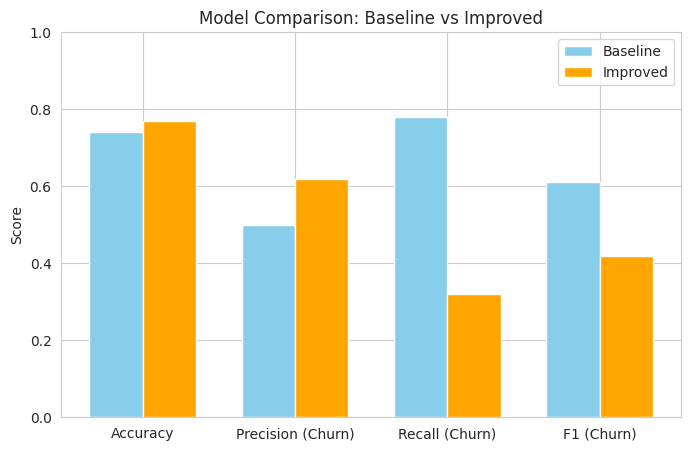

In [54]:
metrics = ['Accuracy', 'Precision (Churn)', 'Recall (Churn)', 'F1 (Churn)']
baseline_scores = [0.74, 0.50, 0.78, 0.61]
improved_scores = [0.77, 0.62, 0.32, 0.42]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, baseline_scores, width, label='Baseline', color='skyblue')
plt.bar(x + width/2, improved_scores, width, label='Improved', color='orange')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Model Comparison: Baseline vs Improved')
plt.legend()
plt.show()


🧠 Interpretation
🟦 Baseline Model

High recall for churn (0.78) → catches most churners.

Lower precision (0.50) → over-predicts churn (false positives).

Good for customer retention tasks, since it’s better to flag more churners even if some are false alarms.
✅ Bias toward sensitivity (detecting churners).

🟨 Improved Model

Higher accuracy (0.77) and precision (0.62) for churn.

But recall for churn dropped sharply (0.32) — many churners now missed.

Model became more conservative — better at identifying loyal customers (recall 0.93 for class 0).
⚠️ Bias toward specificity (avoiding false churn alerts).

🎯 Business-Level Insight
Scenario	Recommended Model	Reason
Churn prevention campaign (cost of missing churners is high)	✅ Baseline Model	Better recall → catches more potential churners to target with offers.
Retention cost optimization (don’t want too many false churners)	⚖️ Improved Model	Fewer false positives → more cost-effective targeting.